# Tuto spisem, co vsetko mam
- Explorativna analyza
- Agresivita samce samice, ale celkom dobre
- Kastracia
- Kastracia pokracovanie
- Kastracia pokracovanie
- Agresivita psov vs vek (este doplnit brechanie treba)
- Impulzivita a Nepozornost vs vek
- Strach vs vek
- Najtazsie a najlahsie plemena (mohol by som skusit spravit nejaku zavislost na agresivite v zavislosti od velkosti plemena)
- Agresivita vs Strach - zaujimave
- Agresivita vs citlivost na hluk
- Strach vs citlivost na hluk

### Napady
- 

# Napady na hypotezy
<!-- #### Agresivita
-  -->
### Najprv zistenia
- Samci su agresivnejsi k vlastnemmu pohlaviu, a samice k opacnemu, ale iba o trochu, samci su agresivnejsi k ludom


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown
# from google.colab import files
# uploaded = files.upload()

### Prikazy na stiahnutie z excelu a ulozenie do csv kvoli nacitavaniu
# dog_info = pd.read_excel("data-for-publication.xlsx", sheet_name="Information", header=0)
# dog_info.to_csv("psy_info.csv")
# files.download("psy_info.csv")

## Stiahnem data a ulozim ich v csv a vyrobim dataframe dogs a dogs info

In [49]:
dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
dog_info = pd.read_csv("psy_info.csv", header=0)
casti = ['Demographic information', 'Environment and background', 'Personality', 
     'Noise sensitivity', 'Fearfulness', 'Aggression', 
     'Fear of surfaces and heights', 'Separation anxiety', 'Impulsivity/ inattention']
zoz = []
for i in dog_info['SECTION']:
    if i in casti:
        slovo = i
    zoz.append(slovo)
dog_info['SECTION'] = pd.Series(zoz)
dog_info = dog_info.set_index('SECTION').drop('Unnamed: 0', axis=1)


## Tuto budu zoznamy jednotlivych casti, a urobene casti tabulky podla kategorie


In [ ]:
spojite_vsetky = dog_info[dog_info['COLUMN VALUES'].str.contains('continuous', na=False)]
spojite = list(spojite_vsetky.query('SECTION != "Demographic information"')['COLUMN NAME'])
spojite_set = set(spojite)

dogs_demographic = dogs.transpose().iloc[0:11].transpose()
dogs_environment = dogs.transpose().iloc[11:42].transpose()
dogs_personality = dogs.transpose().iloc[42:112].transpose()
dogs_noise_sensitivity = dogs.transpose().iloc[112:154].transpose()
dogs_fearfullness = dogs.transpose().iloc[154:189].transpose()
dogs_aggression = dogs.transpose().iloc[189:214].transpose()
dogs_fear_surfaces = dogs.transpose().iloc[214:222].transpose()
dogs_separation_anxiety = dogs.transpose().iloc[222:232].transpose()
dogs_inattention = dogs.transpose().iloc[232:250].transpose()


demographic = list(dogs_demographic.columns)
environment = list(dogs_environment.columns)
personality = list(dogs_personality.columns)
noise_sensitivity = list(dogs_noise_sensitivity.columns)
fearfullness = list(dogs_fearfullness.columns)
aggression = list(dogs_aggression.columns)
fear_surfaces = list(dogs_fear_surfaces.columns)
separation_anxiety = list(dogs_separation_anxiety.columns)
inattention = list(dogs_inattention.columns)

demographic_continuous = list(spojite_set & set(demographic))
environment_continuous = list(spojite_set & set(environment))
personality_continuous = list(spojite_set & set(personality))
noise_sensitivity_continuous = list(spojite_set & set(noise_sensitivity))
fearfullness_continuous = list(spojite_set & set(fearfullness))
aggression_continuous = list(spojite_set & set(aggression))
fear_surfaces_continuous = list(spojite_set & set(fear_surfaces))
separation_anxiety_continuous = list(spojite_set & set(separation_anxiety))
inattention_continuous = list(spojite_set & set(inattention))

demographic_discrete = list(set(demographic) - spojite_set)
environment_discrete = list(set(environment) - spojite_set)
personality_discrete = list(set(personality) - spojite_set)
noise_sensitivity_discrete = list(set(noise_sensitivity) - spojite_set)
fearfullness_discrete = list(set(fearfullness) - spojite_set)
aggression_discrete = list(set(aggression) - spojite_set)
fear_surfaces_discrete = list(set(fear_surfaces) - spojite_set)
separation_anxiety_discrete = list(set(separation_anxiety) - spojite_set)
inattention_discrete = list(set(inattention) - spojite_set)


# Explorativna analyza

mnozstvo samcov: 7237
mnozstvo samic: 8134
nozstvo plemien: 52


<Axes: >

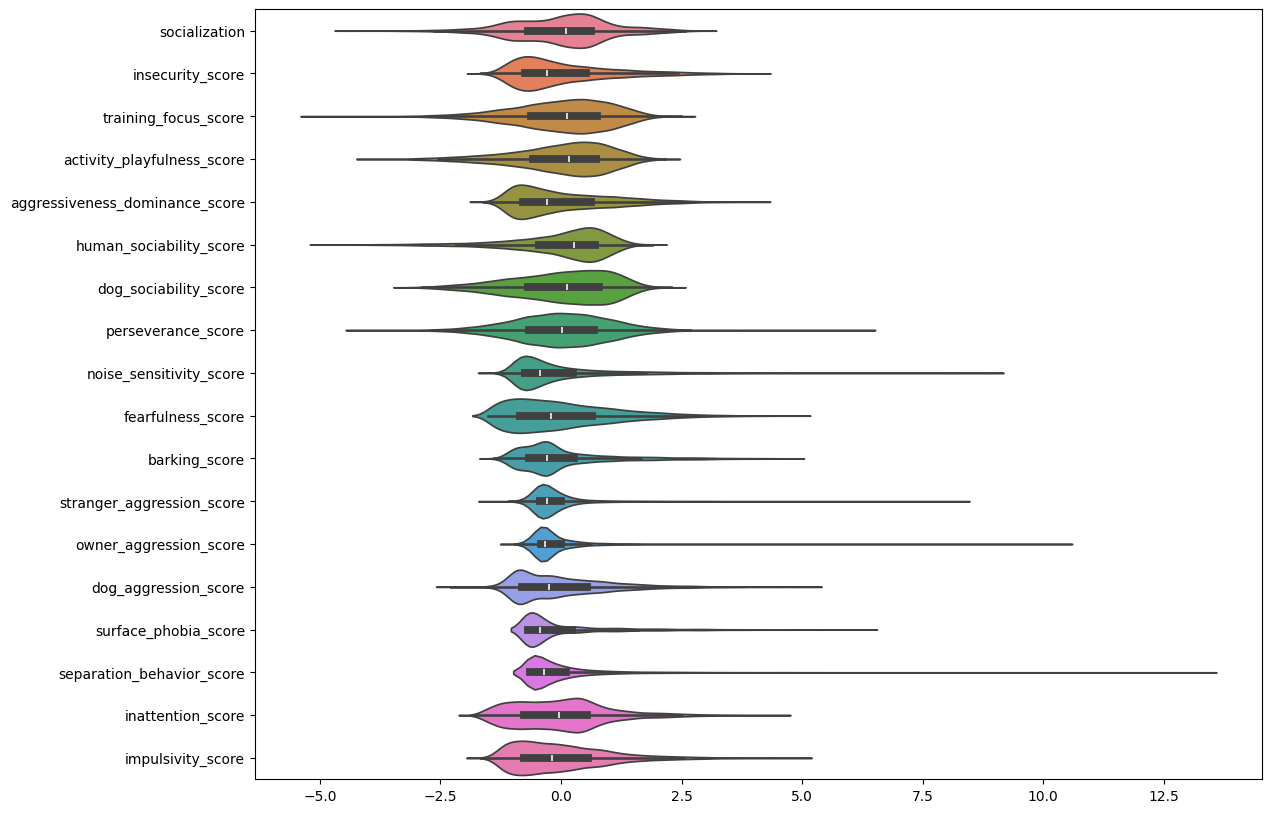

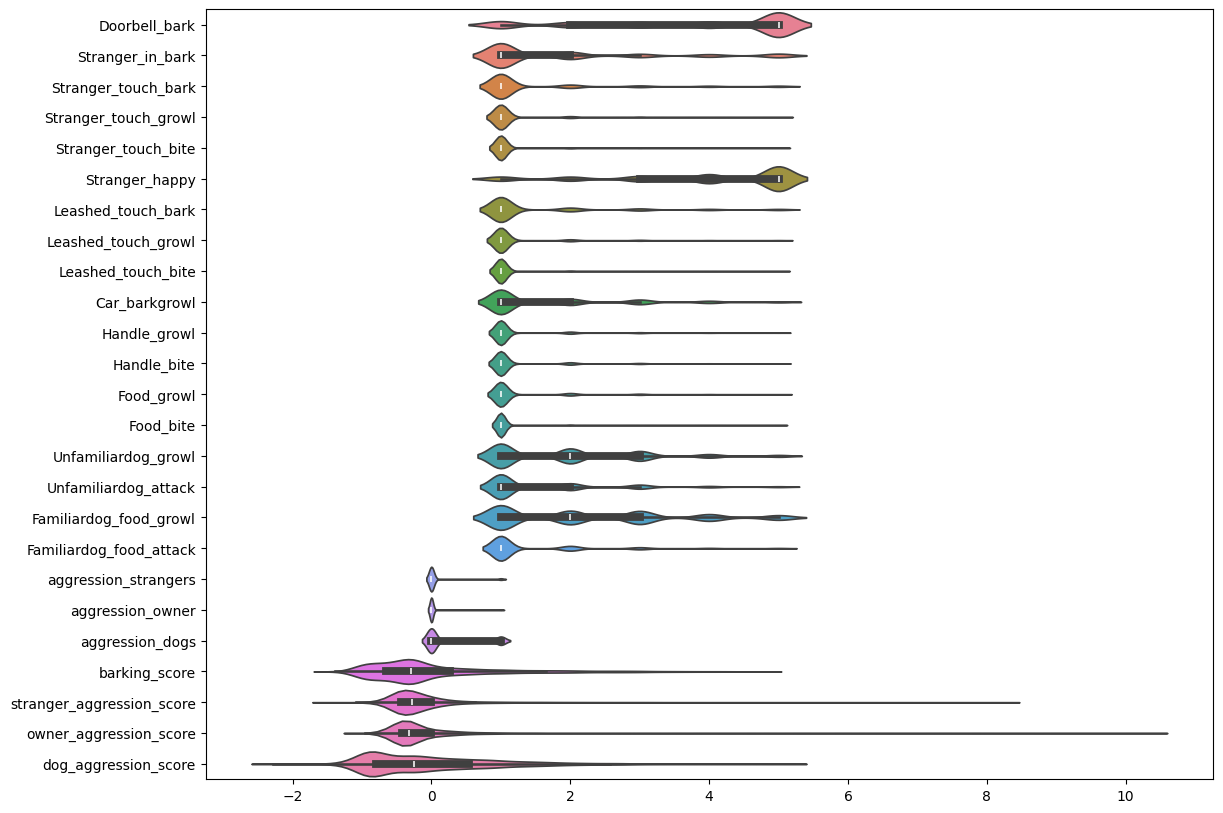

In [ ]:
breeds = list(dogs['breed_group'].unique())
breed_count = len(breeds)
male_count = len(dogs.query("sex=='male'"))
female_count = len(dogs.query("sex=='female'"))

# print('plemena:', breeds)
print('mnozstvo samcov:', male_count)
print('mnozstvo samic:', female_count)
print('nozstvo plemien:', breed_count)


figure, axes = plt.subplots(1, 1, figsize=(13, 10))
sns.violinplot(data=dogs[spojite], orient='h', ax=axes)

figure, axes1 = plt.subplots(1, 1, figsize=(13, 10))
sns.violinplot(data=dogs[aggression], orient='h', ax=axes1)


## Agresivita
#### samce vs samice

-1.387955 4.731223


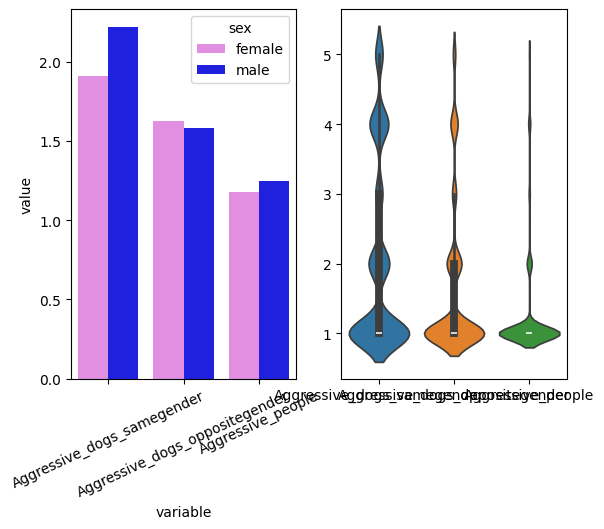

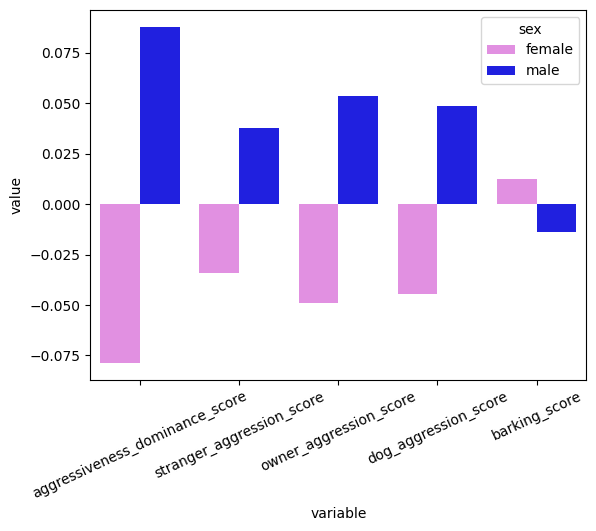

In [52]:

figure, axes = plt.subplots(1, 2)
agresivita_gender = dogs.groupby('sex')[['Aggressive_dogs_samegender', 'Aggressive_dogs_oppositegender', 'Aggressive_people']].mean().reset_index().melt(id_vars='sex')
# display(agresivita_gender)
sns.barplot(agresivita_gender, x='variable', y='value', hue='sex', palette={'male':'blue', 'female':'violet'}, ax=axes[0])
axes[0].tick_params(axis='x', rotation=25)
sns.violinplot(data=dogs[['Aggressive_dogs_samegender', 'Aggressive_dogs_oppositegender', 'Aggressive_people']], ax=axes[1])

figure, axes = plt.subplots(1, 1)
agresivita_gender = dogs.groupby('sex')[['aggressiveness_dominance_score', 'stranger_aggression_score', 'owner_aggression_score', 'dog_aggression_score', 'barking_score']].mean().reset_index().melt(id_vars='sex')
# display(agresivita_gender)
sns.barplot(agresivita_gender, x='variable', y='value', hue='sex', palette={'male':'blue', 'female':'violet'})
axes.tick_params(axis='x', rotation=25)
print(dogs['barking_score'].min(), dogs['barking_score'].max())




# Kastracia
zistovanie najrozdielnejsich vlastnosti v ramci kastracie

In [53]:
pocet = 10
pripocet = 1

kastracia_male = dogs.query('sex=="male"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[8:]
kastracia_male.columns.name = None
kastracia_male["personality_trait"] = kastracia_male.index

kastracia_rozdiely_male = kastracia_male.copy(deep=True)
kastracia_rozdiely_male["diff"] = abs(kastracia_rozdiely_male["intact"] - kastracia_rozdiely_male["sterilized"])
kastracia_rozdiely_male["relative_diff"] = abs((kastracia_rozdiely_male["intact"] - kastracia_rozdiely_male["sterilized"])/(abs(kastracia_rozdiely_male["intact"])+abs(kastracia_rozdiely_male["sterilized"])+pripocet))
# kastracia_rozdiely_male["relative_diff"] = abs((kastracia_rozdiely_male["intact"] - kastracia_rozdiely_male["sterilized"])/(kastracia_rozdiely_male["intact"]))
# toto bol povodny vypocet relativnej zmeny, ale zmenil som o trochu na ten nadnim

index_male_diff = list(kastracia_rozdiely_male.sort_values('diff', ascending=False).head(pocet).index)
index_male_rel_diff = list(kastracia_rozdiely_male.sort_values('relative_diff', ascending=False).head(pocet).index)

###############################################################################################################################

kastracia_female = dogs.query('sex=="female"').groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[8:]
kastracia_female.columns.name = None
kastracia_female["personality_trait"] = kastracia_female.index

kastracia_rozdiely_female = kastracia_female.copy(deep=True)
kastracia_rozdiely_female["diff"] = abs(kastracia_rozdiely_female["intact"] - kastracia_rozdiely_female["sterilized"])
kastracia_rozdiely_female["relative_diff"] = abs((kastracia_rozdiely_female["intact"] - kastracia_rozdiely_female["sterilized"])/(abs(kastracia_rozdiely_female["intact"])+abs(kastracia_rozdiely_female["sterilized"])+pripocet))
# kastracia_rozdiely_female["relative_diff"] = abs((kastracia_rozdiely_female["intact"] - kastracia_rozdiely_female["sterilized"])/kastracia_rozdiely_female["intact"])
# zmenil som vypocet na odkomentovany

index_female_diff = list(kastracia_rozdiely_female.sort_values('diff', ascending=False).head(pocet).index)
index_female_rel_diff = list(kastracia_rozdiely_female.sort_values('relative_diff', ascending=False).head(pocet).index)


## Kastracia pokracovanie - Grafy
vygrafovanie zistenych vlastnosti

Text(0.5, 1.0, 'female')

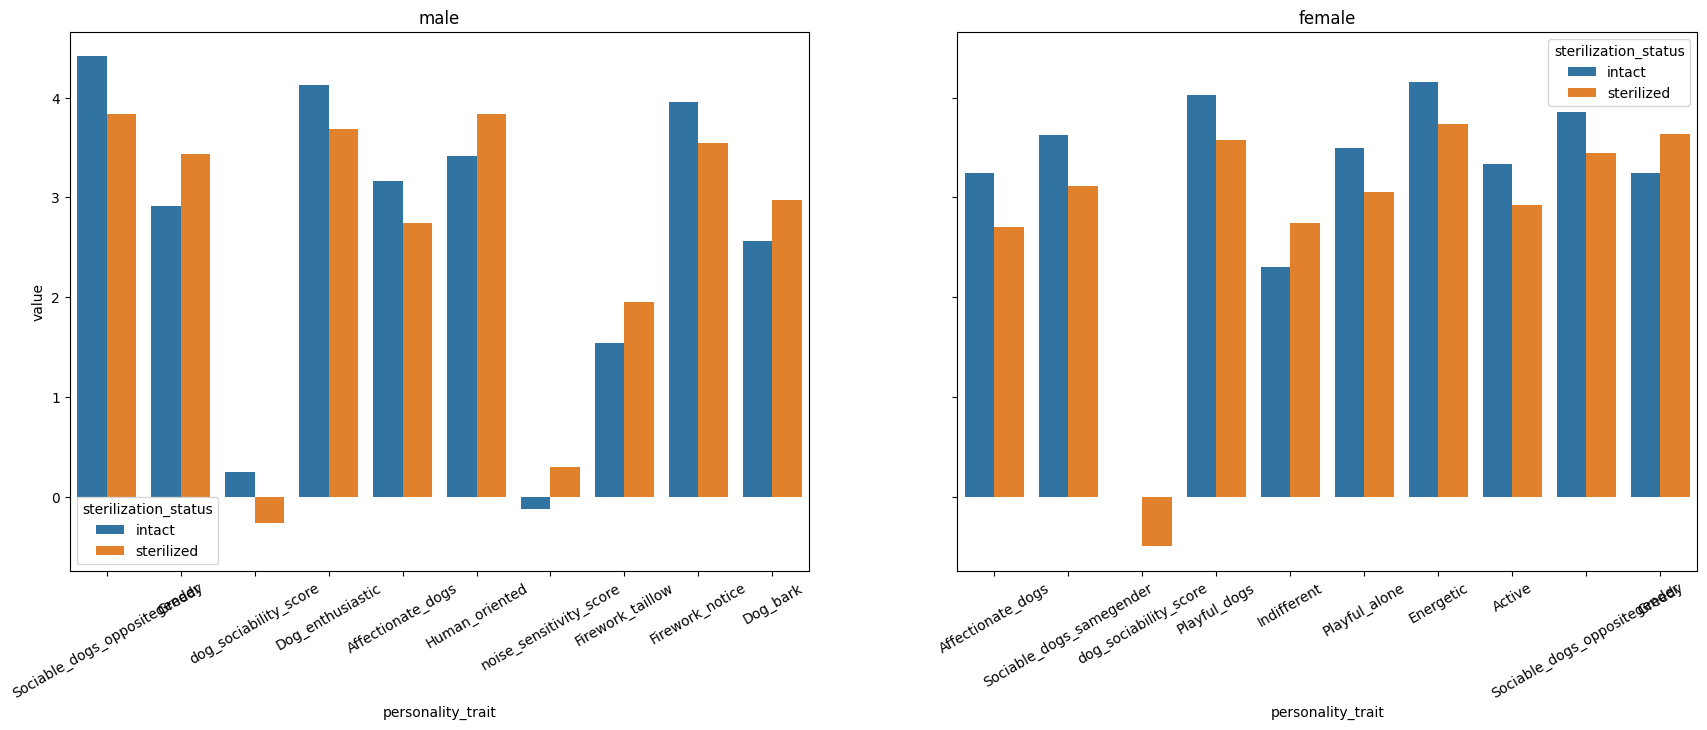

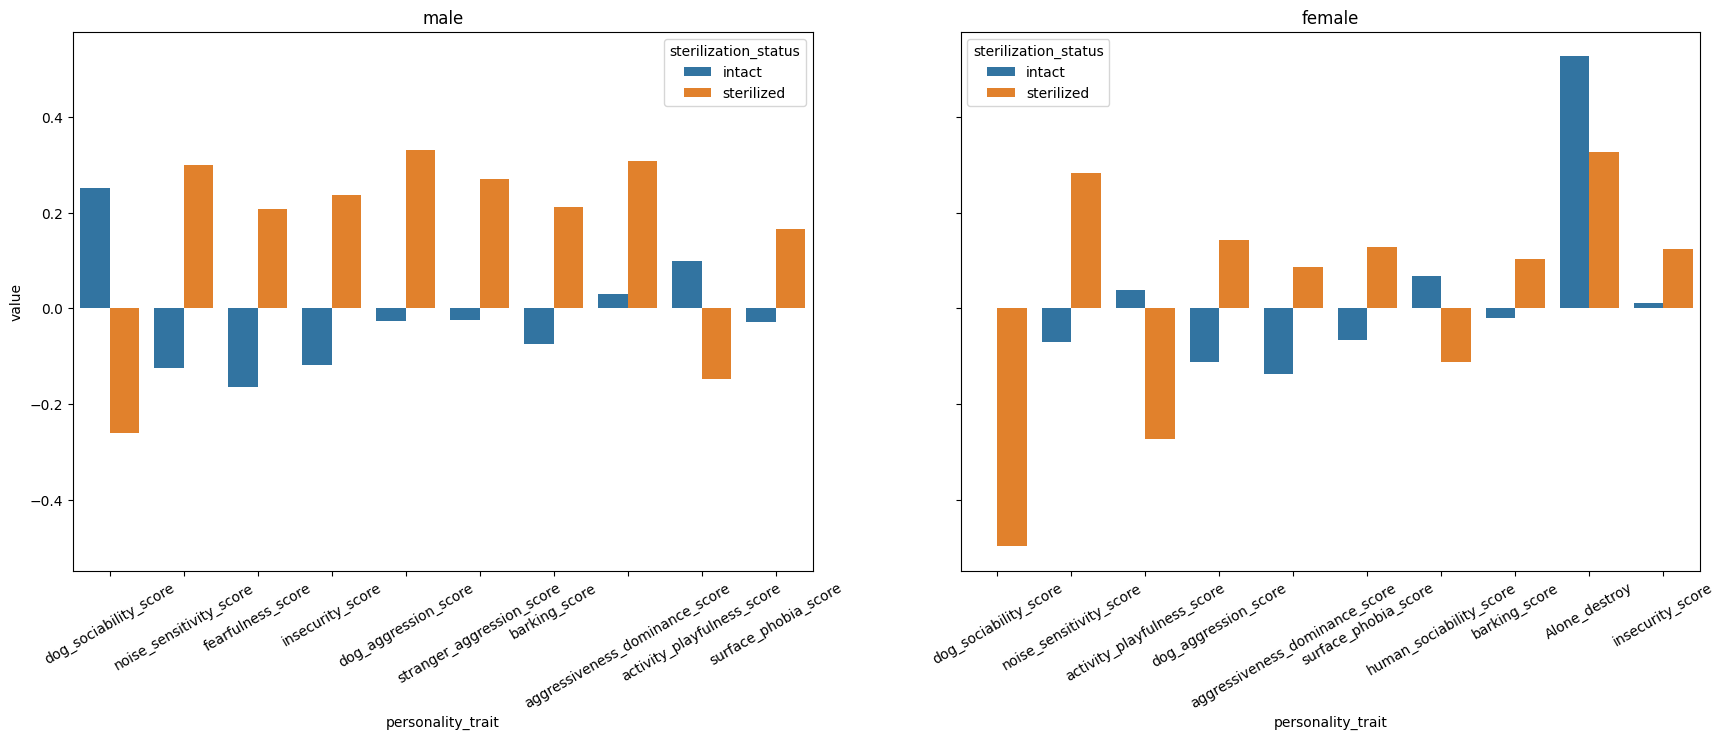

In [54]:
dogs_melted_male_diff = kastracia_male.loc[index_male_diff, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")
dogs_melted_female_diff = kastracia_female.loc[index_female_diff, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")

figure, axes = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
sns.barplot(data=dogs_melted_male_diff, x=dogs_melted_male_diff.index, y="value", hue="sterilization_status", ax=axes[0])
axes[0].tick_params(axis='x', rotation=30)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_female_diff, x=dogs_melted_female_diff.index, y="value", hue="sterilization_status", ax=axes[1])
axes[1].tick_params(axis='x', rotation=30)
axes[1].set_title("female")

###########################################

dogs_melted_male_rel_diff = kastracia_male.loc[index_male_rel_diff, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")
dogs_melted_female_rel_diff = kastracia_female.loc[index_female_rel_diff, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")

figure, axes = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
sns.barplot(data=dogs_melted_male_rel_diff, x=dogs_melted_male_rel_diff.index, y="value", hue="sterilization_status", ax=axes[0])
axes[0].tick_params(axis='x', rotation=30)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_female_rel_diff, x=dogs_melted_female_rel_diff.index, y="value", hue="sterilization_status", ax=axes[1])
axes[1].tick_params(axis='x', rotation=30)
axes[1].set_title("female")

## Kastracia dalsia
planujem urobit ze zoberiem spojite premenne z jednotlivych casti dotaznika
a porovnam s ktorou suvisi kastrovanie najviac (nemam nicim podlozene, ale pride mi ze pri jednotlivych otazkach to moze byt aj trochu nahodne)

Text(0.5, 1.0, 'female')

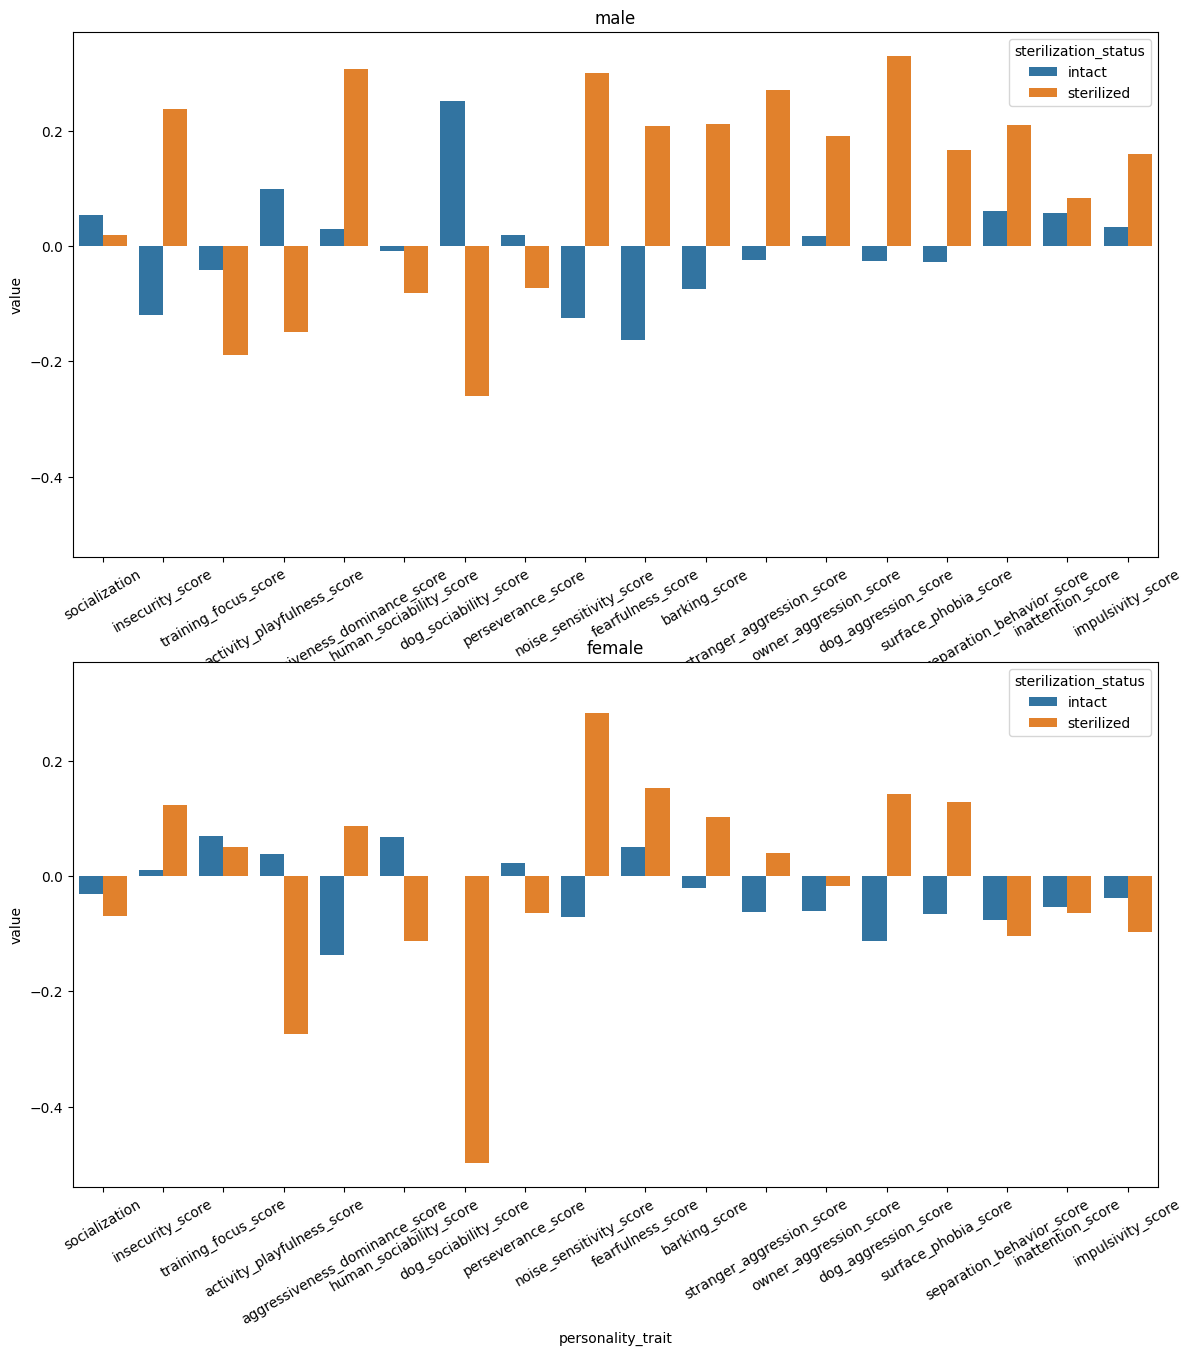

In [ ]:
dogs_melted_spojite_male = kastracia_male.loc[spojite, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")
dogs_melted_spojite_female = kastracia_female.loc[spojite, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")


figure, axes = plt.subplots(2, 1, figsize=(14, 15), sharey=True)
sns.barplot(data=dogs_melted_spojite_male, x=dogs_melted_spojite_male.index, y="value", hue="sterilization_status", ax=axes[0])
axes[0].tick_params(axis='x', rotation=30)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_spojite_female, x=dogs_melted_spojite_female.index, y="value", hue="sterilization_status", ax=axes[1])
axes[1].tick_params(axis='x', rotation=30)
axes[1].set_title("female")

## Kastracia a agresivita
porovnam podobnym bargrafom agresivitu

Text(0.5, 1.0, 'female')

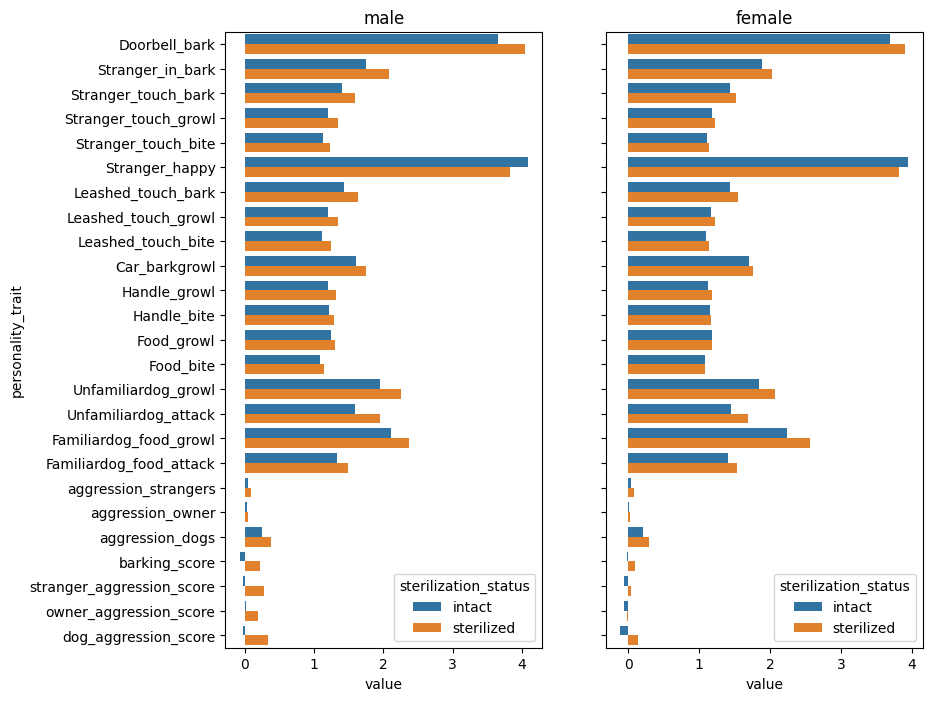

In [ ]:
dogs_melted_aggression_male = kastracia_male.loc[aggression, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")
dogs_melted_aggression_female = kastracia_female.loc[aggression, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")

figure, axes = plt.subplots(1, 2, figsize=(9, 8), sharey=True)
sns.barplot(data=dogs_melted_aggression_male, y=dogs_melted_aggression_male.index, x="value", hue="sterilization_status", ax=axes[0], orient='h')
# axes[0].tick_params(axis='x', rotation=30)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_aggression_female, y=dogs_melted_aggression_female.index, x="value", hue="sterilization_status", ax=axes[1], orient='h')
# axes[1].tick_params(axis='x', rotation=30)
axes[1].set_title("female")


## Kastracia dalsia


Text(0.5, 1.0, 'female')

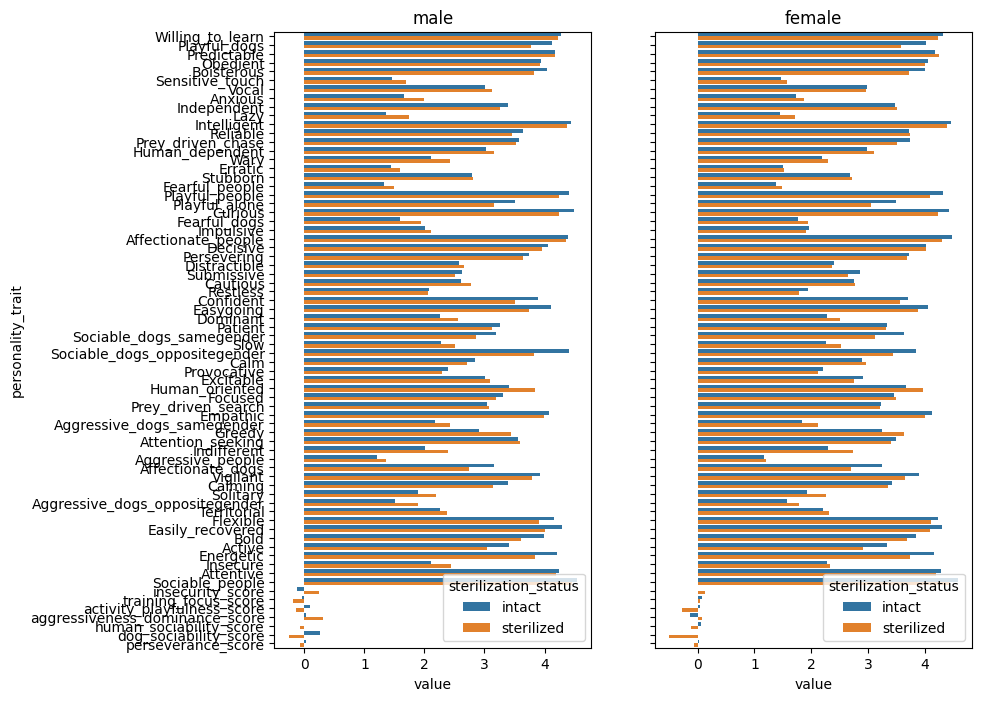

In [64]:
dogs_melted_personality_male = kastracia_male.loc[personality, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")
dogs_melted_personality_female = kastracia_female.loc[personality, :].melt(id_vars=["personality_trait"], var_name='sterilization_status').set_index("personality_trait")

figure, axes = plt.subplots(1, 2, figsize=(9, 8), sharey=True)
sns.barplot(data=dogs_melted_personality_male, y=dogs_melted_personality_male.index, x="value", hue="sterilization_status", ax=axes[0], orient='h')
# axes[0].tick_params(axis='x', rotation=30)
axes[0].set_title("male")
sns.barplot(data=dogs_melted_personality_female, y=dogs_melted_personality_female.index, x="value", hue="sterilization_status", ax=axes[1], orient='h')
# axes[1].tick_params(axis='x', rotation=30)
axes[1].set_title("female")


### Tuto je agresivita psov
##### ku psom, majitelom a cudzncom
podla veku 

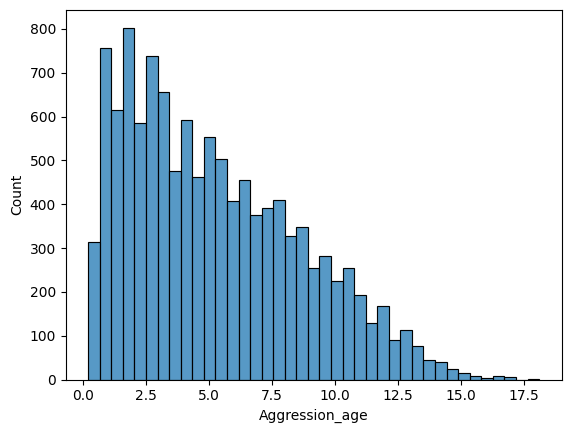

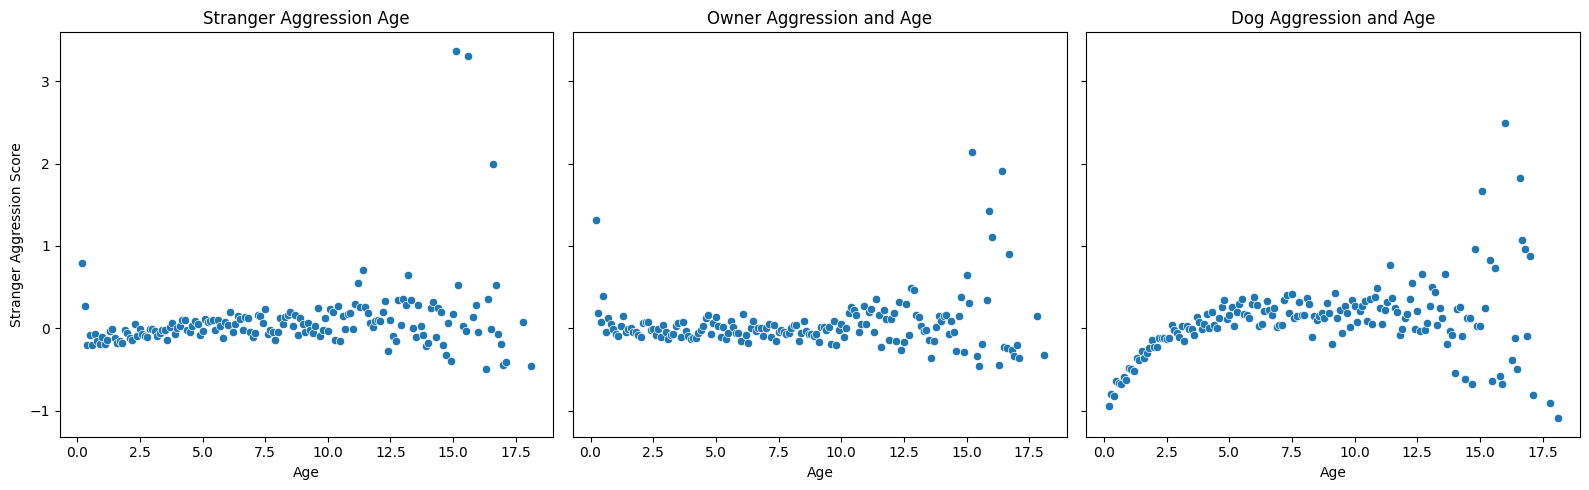

In [57]:
psy = dogs.copy(deep=True)
psy["Aggression_age"] = psy["Aggression_age"].round(1)
a = psy.groupby("Aggression_age")["stranger_aggression_score"].mean()
a = pd.DataFrame(a)

b = psy.groupby("Aggression_age")["owner_aggression_score"].mean()
b = pd.DataFrame(b)


c = psy.groupby("Aggression_age")["dog_aggression_score"].mean()
c = pd.DataFrame(c)


ax = sns.histplot(data=psy, x="Aggression_age")


figure, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
sns.scatterplot(x=a.index, y=a["stranger_aggression_score"], ax=axes[0])
axes[0].set_title("Stranger Aggression Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Stranger Aggression Score")

# Scatterplot 2
sns.scatterplot(x=b.index, y=b["owner_aggression_score"], ax=axes[1])
axes[1].set_title("Owner Aggression and Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Owner Aggression Score")

# Scatterplot 3
sns.scatterplot(x=c.index, y=c["dog_aggression_score"], ax=axes[2])
axes[2].set_title("Dog Aggression and Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Dog Aggression Score")

plt.tight_layout()
plt.show()


### Teraz spravim podobne impulzivitu a nepozornost
nasiel som jemnu zavislost, impulzivita stupa a vrcholi okolo 1 roka, potom pomaly klesa, nepozornost je na tom velmi podobne



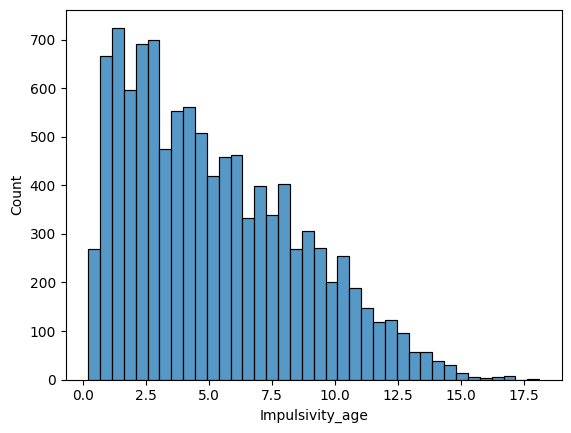

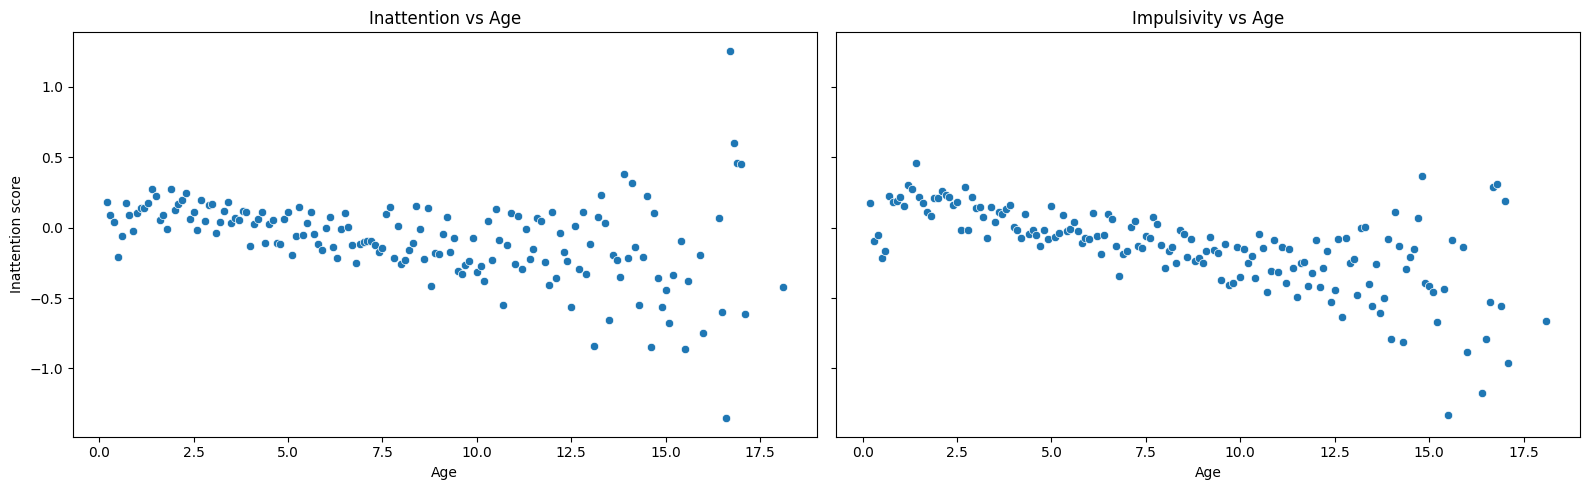

In [58]:
psy2 = dogs.copy(deep=True)
psy2["Impulsivity_age"] = psy2["Impulsivity_age"].round(1)
d = psy2.groupby("Impulsivity_age")["inattention_score"].mean()
d = pd.DataFrame(d)

e = psy2.groupby("Impulsivity_age")["impulsivity_score"].mean()
e = pd.DataFrame(e)

ax = sns.histplot(data=psy2, x="Impulsivity_age")

figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=d.index, y=d["inattention_score"], ax=axes[0])
axes[0].set_title("Inattention vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Inattention score")

# Scatterplot 2
sns.scatterplot(x=e.index, y=e["impulsivity_score"], ax=axes[1])
axes[1].set_title("Impulsivity vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Impulsivity Score")

plt.tight_layout()
plt.show()

### Teraz spravim podobne strach
pri strachu ale nevidim ziadnu suvislost




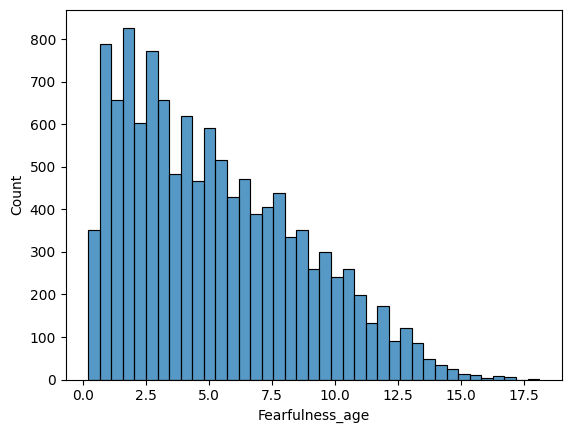

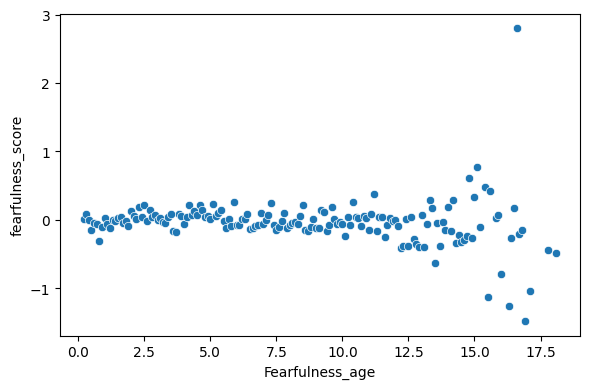

In [59]:
psy3 = dogs.copy(deep=True)
psy3["Fearfulness_age"] = psy3["Fearfulness_age"].round(1)
f = psy3.groupby("Fearfulness_age")["fearfulness_score"].mean()
f = pd.DataFrame(f)
ax = sns.histplot(data=psy3, x="Fearfulness_age")

figure, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.scatterplot(x=f.index, y=f["fearfulness_score"], ax=axes)

plt.tight_layout()
plt.show()



### Priemerne hmotnosti jednotlivych plemien barplot


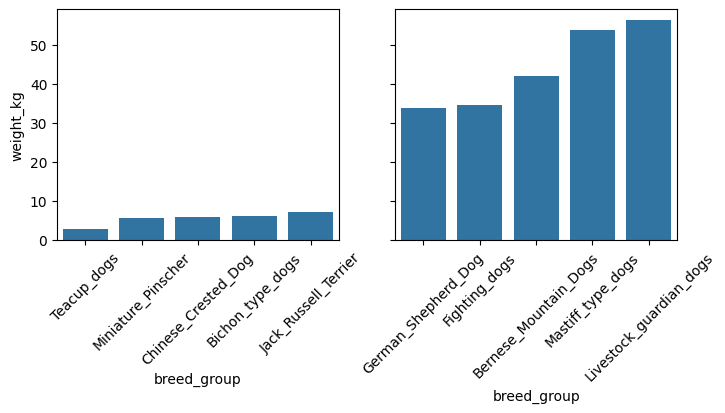

In [60]:

psy_hmostnost_max = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).head()
psy_hmostnost_min = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).tail()

figure, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
sns.barplot(data=psy_hmostnost_max, x=psy_hmostnost_max.index, y='weight_kg', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=psy_hmostnost_min, x=psy_hmostnost_min.index, y='weight_kg', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)


pocty_psov = pd.DataFrame(dogs.groupby("breed_group").count().sort_values(by="sex"))
# figure, axes1 = plt.subplots(1, 1)
# display(pocty_psov)
# sns.histplot(data=pocty_psov, ax=axes1)

### Teraz Spravim Agresivitu vs Strach

Text(0.5, 1.0, 'Barking Fearfulness')

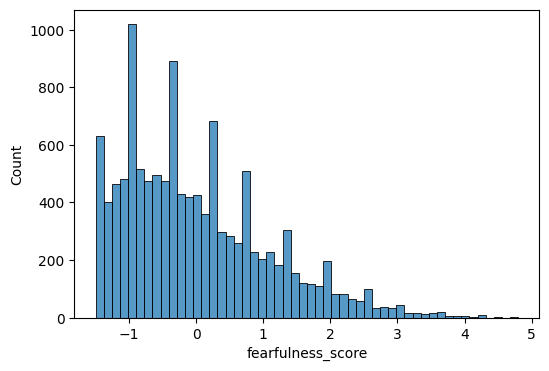

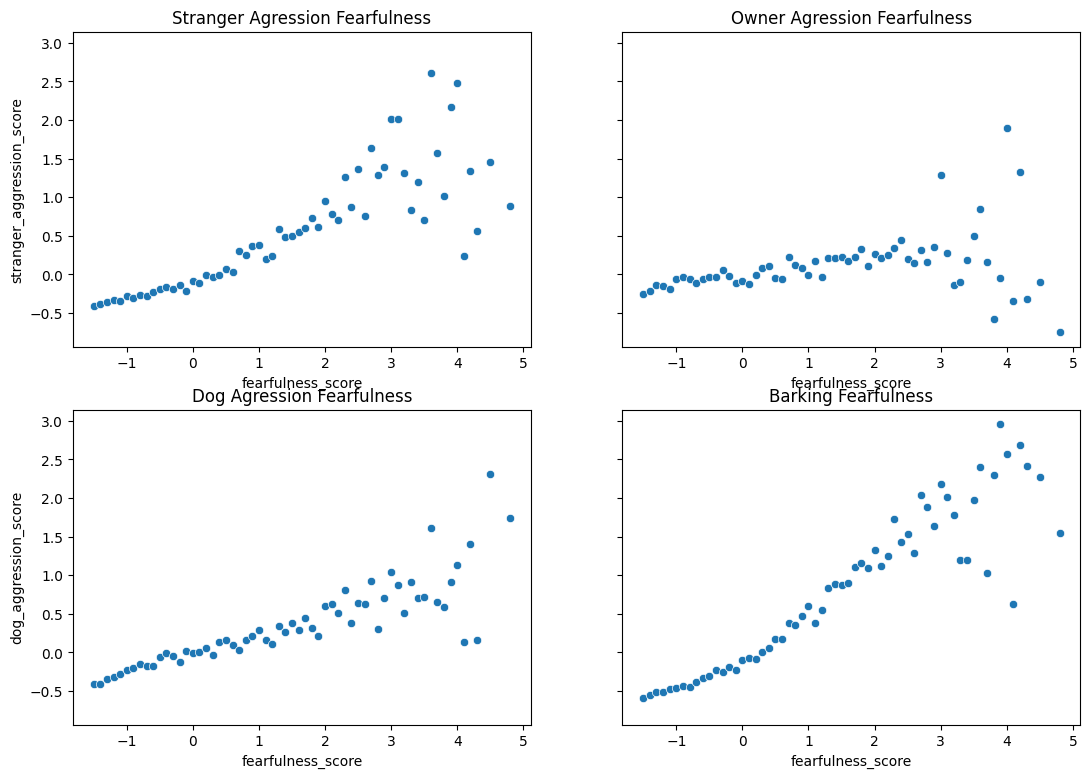

In [61]:

psy4 = dogs.copy(deep=True)
psy4["fearfulness_score"] = psy4["fearfulness_score"].round(1)

psy4_stranger = psy4.groupby("fearfulness_score")["stranger_aggression_score"].mean()
psy4_stranger = pd.DataFrame(psy4_stranger)
# display(psy4_stranger)

psy4_owner = psy4.groupby("fearfulness_score")["owner_aggression_score"].mean()
psy4_owner = pd.DataFrame(psy4_owner)
# display(psy4_owner)

psy4_dog = psy4.groupby("fearfulness_score")["dog_aggression_score"].mean()
psy4_dog = pd.DataFrame(psy4_dog)
# display(psy4_dog)

psy4_barking = psy4.groupby("fearfulness_score")["barking_score"].mean()
psy4_barking = pd.DataFrame(psy4_barking)
# display(psy4_barking)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy4, x="fearfulness_score")

figure, axes = plt.subplots(2, 2, figsize=(13, 9), sharey=True)
sns.scatterplot(x=psy4_stranger.index, y=psy4_stranger["stranger_aggression_score"], ax=axes[0][0])
axes[0][0].set_title("Stranger Agression Fearfulness")

sns.scatterplot(x=psy4_owner.index, y=psy4_owner["owner_aggression_score"], ax=axes[0][1])
axes[0][1].set_title("Owner Agression Fearfulness")

sns.scatterplot(x=psy4_dog.index, y=psy4_dog["dog_aggression_score"], ax=axes[1][0])
axes[1][0].set_title("Dog Agression Fearfulness")

sns.scatterplot(x=psy4_dog.index, y=psy4_barking["barking_score"], ax=axes[1][1])
axes[1][1].set_title("Barking Fearfulness")


### Citlivost na Hluk vs Agresivita

Text(0.5, 1.0, 'Barking vs noise sensitivity')

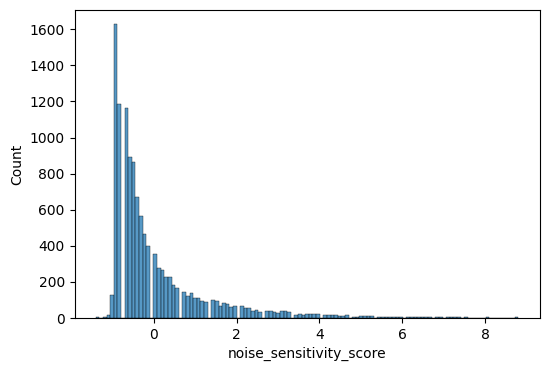

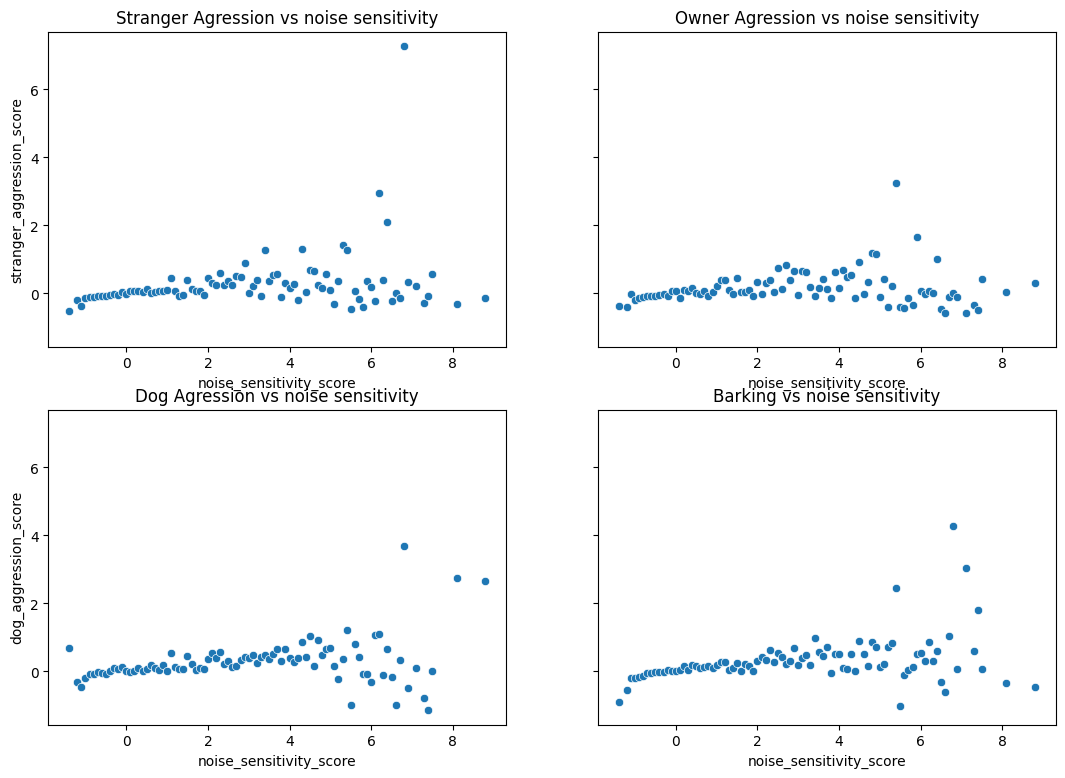

In [62]:

psy5 = dogs.copy(deep=True)
psy5["noise_sensitivity_score"] = psy5["noise_sensitivity_score"].round(1)

psy5_stranger = psy5.groupby("noise_sensitivity_score")["stranger_aggression_score"].mean()
psy5_stranger = pd.DataFrame(psy5_stranger)
# display(psy5_stranger)

psy5_owner = psy5.groupby("noise_sensitivity_score")["owner_aggression_score"].mean()
psy5_owner = pd.DataFrame(psy5_owner)
# display(psy5_owner)

psy5_dog = psy5.groupby("noise_sensitivity_score")["dog_aggression_score"].mean()
psy5_dog = pd.DataFrame(psy5_dog)
# display(psy5_dog)

psy5_barking = psy5.groupby("noise_sensitivity_score")["barking_score"].mean()
psy5_barking = pd.DataFrame(psy5_barking)
# display(psy5_barking)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy5, x="noise_sensitivity_score")

figure, axes = plt.subplots(2, 2, figsize=(13, 9), sharey=True)
sns.scatterplot(x=psy5_stranger.index, y=psy5_stranger["stranger_aggression_score"], ax=axes[0][0])
axes[0][0].set_title("Stranger Agression vs noise sensitivity")

sns.scatterplot(x=psy5_owner.index, y=psy5_owner["owner_aggression_score"], ax=axes[0][1])
axes[0][1].set_title("Owner Agression vs noise sensitivity")

sns.scatterplot(x=psy5_dog.index, y=psy5_dog["dog_aggression_score"], ax=axes[1][0])
axes[1][0].set_title("Dog Agression vs noise sensitivity")

sns.scatterplot(x=psy5_dog.index, y=psy5_barking["barking_score"], ax=axes[1][1])
axes[1][1].set_title("Barking vs noise sensitivity")

### Teraz strach vs citlivost na hluk

Text(0.5, 1.0, 'Fearfulness vs noise sensitivity')

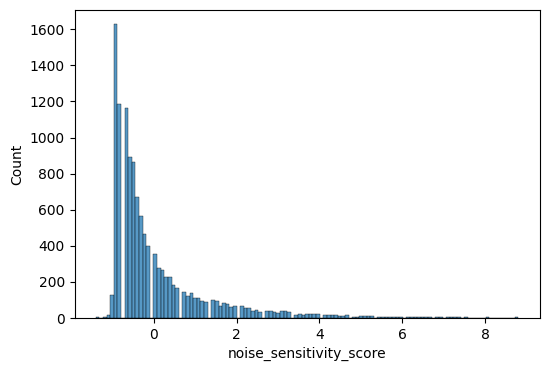

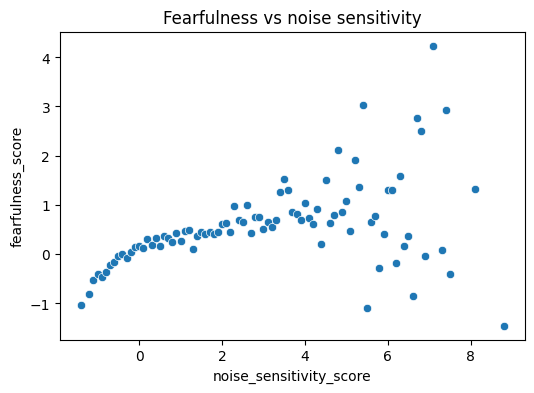

In [63]:
psy6 = dogs.copy(deep=True)
psy6["noise_sensitivity_score"] = psy6["noise_sensitivity_score"].round(1)

psy6_stranger = psy6.groupby("noise_sensitivity_score")["fearfulness_score"].mean()
psy6_stranger = pd.DataFrame(psy6_stranger)
# display(psy6_stranger)

figure, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
ax = sns.histplot(data=psy6, x="noise_sensitivity_score")

figure, axes = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.scatterplot(x=psy6_stranger.index, y=psy6_stranger["fearfulness_score"], ax=axes)
axes.set_title("Fearfulness vs noise sensitivity")


### Este dokoncit tretiu agresivitu